# 6o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : `Grupo 8`

In [1]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

## Definição do par de transformadas DFT - (direta e inversa)   

O par de transformadas discretas de Fourier (Discrete Fourier Transform - DFT) para um sinal de tempo discreto $x[k]$ com índice das amostras igual $k$ e o correspondente espectro de Fourier $X[\mu]$ com índice de frequências $\mu$ é calculado como  
\begin{align}
\text{DFT}: Y[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}Y[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Observe o sinal negativo na função exponential da transformada direta (DFT) e o fator de normalização $1/N$ na transformada inversa (IDFT). Essa convensão é usada pela maioria dos livros textos de DSP e também pela biblioteca Python `numpy.fft.fft()`, `numpy.fft.ifft()` e funções do Matlab `fft()`, `ifft()`.

# PROBLEMA 1

## DFT e IDFT com "loops for"

Agora vamos implementar a DFT e a IDFT usando "loops for". Embora isso possa ser útil para entender e validar algoritmos em sua fase inicial de desenvolvimento, isso deve ser evitado para um código usado na prática: "loops for" normalmente são lentos e muitas vezes mais complicados de ler do que implementações usando matrizes e vetores. Especialmente para $N$ muito grandes, o tempo de computação é muito longo.

De qualquer forma, o conceito de "loop for" é: a DFT pode ser implementada com um "loop for" externo iterando sobre $\mu$ e um "loop for" interno somando todos os $k$ para um $\mu$ específico.

Usamos variável com subscrito _ aqui, a fim de salvar bons nomes de variáveis para o cálculo baseado em matriz.

## Parte A 

Escreva as funções DFT e IDFT que calculam, respectivamente, as transformadas discretas de Fourier direta e inversa. 

In [2]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_1D(x):

    N = len(x)
    Y = np.zeros((N, 1), dtype=complex)
    for mu_ in range(N):
        for k_ in range(N):
            Y[mu_] += x[k_] * np.exp(complex(0,-1)*2*np.pi/N*k_*mu_)
    
    return Y    

In [3]:
#
# Função para calcular a IDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos) 
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
#
def IDFT_1D(Y):

    N = len(Y)
    x = np.zeros((N, 1), dtype=complex)
    
    for k_ in range(N):
        for mu_ in range(N):
            x[k_] += Y[mu_]*np.exp(complex(0,1)*2*np.pi/N*k_*mu_)
        x[k_] = x[k_]/N
    
    return x    

## Parte B 

Estude o código abaixo que cria uma sinal discreto composto pela soma de três ondas senoides com amplitude e frequências distintas e um valor constante (nível DC). 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


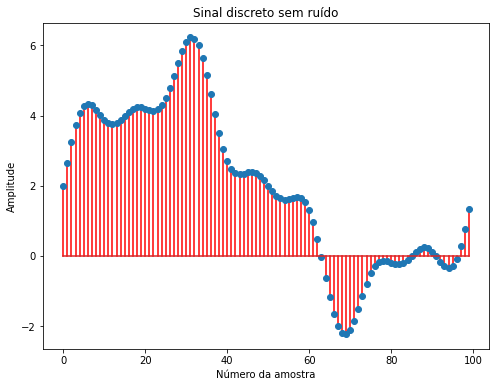

In [4]:
# número de amostras
sr = 100

# intervalo de amostragem
ts = 1.0/sr
t = np.arange(0,1,ts)
t_amostra = np.arange(0,sr,1)

# nível DC - frequência ZERO
sinal_sem_ruido = 2.

# componente com frequência de 1 Hz
freq = 1.
sinal_sem_ruido += 3*np.sin(2*np.pi*freq*t)

# componente com frequência de 4 Hz
freq = 4.
sinal_sem_ruido += 1*np.sin(2*np.pi*freq*t)

# componente com frequência de 7 Hz
freq = 7.   
sinal_sem_ruido += 0.5*np.sin(2*np.pi*freq*t)


plt.figure(figsize = (8, 6))
plt.stem(t_amostra, sinal_sem_ruido, linefmt='red')
plt.xlabel('Número da amostra')
plt.ylabel('Amplitude')
plt.title('Sinal discreto sem ruído')

plt.show()

## Parte C 

A função densidade de probabilidade Gaussiana (também chamada de normal) é definida por:

$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},$

sendo que $\mu$ é a média e $\sigma$ o desvio padrão. O quadrado do desvio padrão, $\sigma^2$, é chamado de variância.

A função tem seu pico na média e seu espalhamento (“spread”) aumenta com o desvio padrão (a função atinge 0,607 vezes seu máximo em $x+\sigma$ e $x-\sigma$). Isso implica que a normal é mais provável de retornar amostras próximas à média, em vez de amostras distantes.

Estude o código abaixo que cria uma função de distribuição gaussiana, que está simulando a distribuição do ruído de um sinal. **Dê maior atenção à função geradora da distribuição (np.random.normal)**

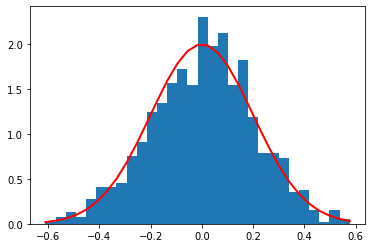

In [5]:
# Define os valores da média e desvio padrão da função distribuição de probabilidade Gaussiana
mu, sigma = 0, 0.2 
num_amostras = 1000 #len(sinal_sem_ruido)

# Gera a distribuição com um número de amostra dado pelo tamanho do sinal
s = np.random.normal(mu, sigma, num_amostras)

# Calcula o histograma dos valores de ruído aleatório
num_bins = 30
count, bins, ignored = plt.hist(s, num_bins, density=True)

# Define a função densidade de probabilidade (curva em vermelho)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

# Plota os resultados
plt.plot(bins, pdf, linewidth=2, color='r')
plt.show()

## Parte D

Escreva abaixo um código que adicione ruído Gaussiano a um sinal de entrada. A função densidade de probabilidade do ruído deverá ter média "mu" e desvio padrão "std". 

In [6]:
def adiciona_ruido_gaussiano(sinal, mu, std):
    num_amostras = len(sinal)
    dist = np.random.normal(mu, std, num_amostras)
    sinal_com_ruido = sinal + dist
    return sinal_com_ruido

## Parte E

Usando a função codificada acima, insira ruído ao sinal criado na Parte B. **O ruído deverá ter média zero e desvio padrão igual a 0,8**. A seguir plote lado-a-lado os sinais (com e sem ruído) usando as funções **plt.subplot** e **plt.plot** e verifique a distorção ocorrida entre os sinais.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


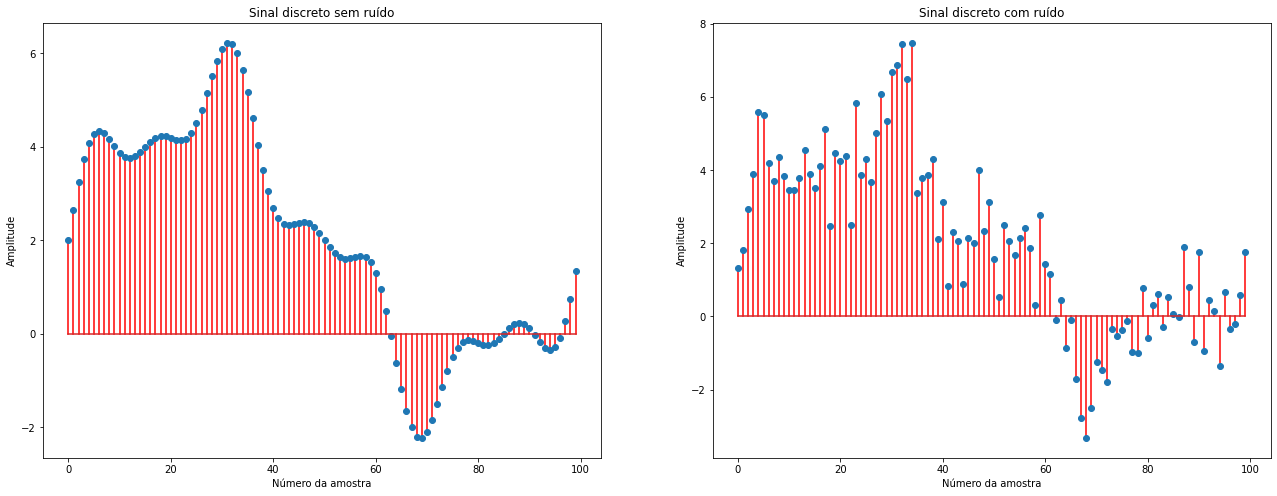

In [7]:
sinal_com_ruido = adiciona_ruido_gaussiano(sinal_sem_ruido, 0, 0.8)

plt.figure(figsize = (22, 8))
plt.subplot(121),plt.stem(t_amostra, sinal_sem_ruido, linefmt='red')
plt.xlabel('Número da amostra')
plt.ylabel('Amplitude')
plt.title('Sinal discreto sem ruído')
plt.subplot(122),plt.stem(t_amostra, sinal_com_ruido, linefmt='red')
plt.xlabel('Número da amostra')
plt.ylabel('Amplitude')
plt.title('Sinal discreto com ruído')
plt.show()

plt.show() 

# Parte F

Agora, usando a **função DFT que você implementou na Parte A**, plote lado-a-lado os espetros de frequências dos sinais com e sem ruído. 

**OBS:** Lembre de posicionar as frequências de maneira que as frequências negativas fiquem à esquerdo do zero (nível DC) e as positivas à direita.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and s

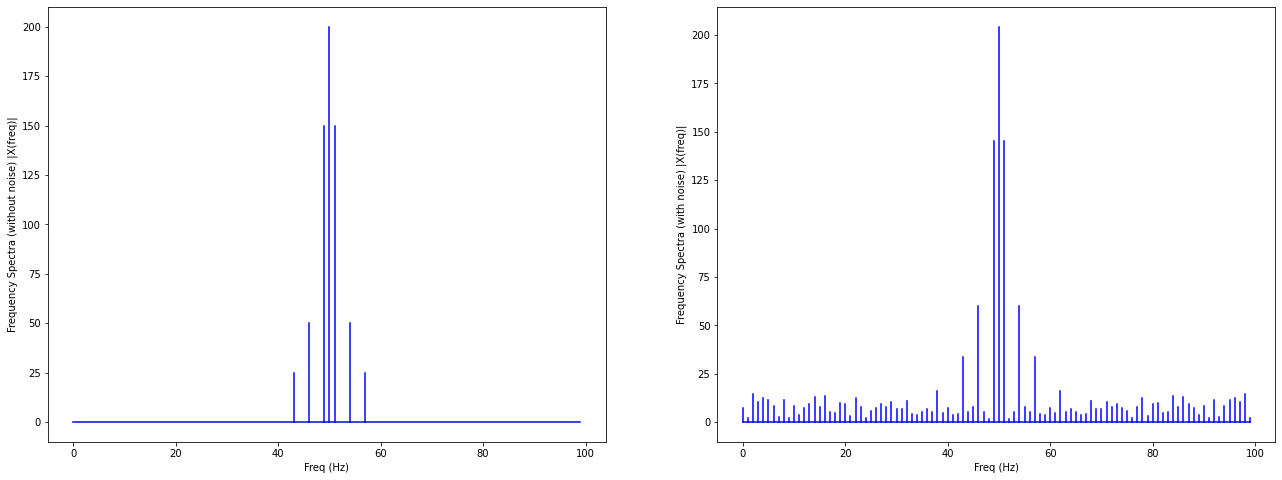

In [8]:
# tamanho do vetor
N = len(sinal_sem_ruido)

_sinal_sem_ruido = sinal_sem_ruido
_sinal_com_ruido = sinal_com_ruido

# Isso vai alternar cada vez que você executar...
for i in range(N):
    _sinal_sem_ruido[i] = _sinal_sem_ruido[i] * (-1)**i
    _sinal_com_ruido[i] = _sinal_com_ruido[i] * (-1)**i

signal_without_noise_Y = DFT_1D(_sinal_sem_ruido)
signal_with_noise_Y = DFT_1D(_sinal_com_ruido)

#signal_without_noise_Y_shift = np.fft.fftshift(signal_without_noise_Y)
#signal_with_noise_Y_shift = np.fft.fftshift(signal_with_noise_Y)

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (22, 8))
plt.subplot(121),plt.stem(freq, abs(signal_without_noise_Y), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Frequency Spectra (without noise) |X(freq)|')
plt.subplot(122),plt.stem(freq, abs(signal_with_noise_Y), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Frequency Spectra (with noise) |X(freq)|')
plt.show()

# Parte G

Analisando os gráficos obtidos da Parte F, elabore (no domínio da frequência) uma estratégia simples para a eliminação do ruído que foi inserido no sinal na Parte E. 

In [9]:
def signal_frequency_magnitude_threshold(signal, cut_of_frequency_magnitude):
    N = len(signal)
    cut_signal = np.zeros(N, dtype=complex)

    for i in range(N):
        if (abs(signal_with_noise_Y[i]) >= cut_of_frequency_magnitude):
            cut_signal[i] = signal_with_noise_Y[i]

    return cut_signal

thresholded_signal = signal_frequency_magnitude_threshold(signal_with_noise_Y, 20)

# Parte H

Plote lado-a-lado os gráficos do sinal original e o sinal recuperado após a eliminação do ruído.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. 

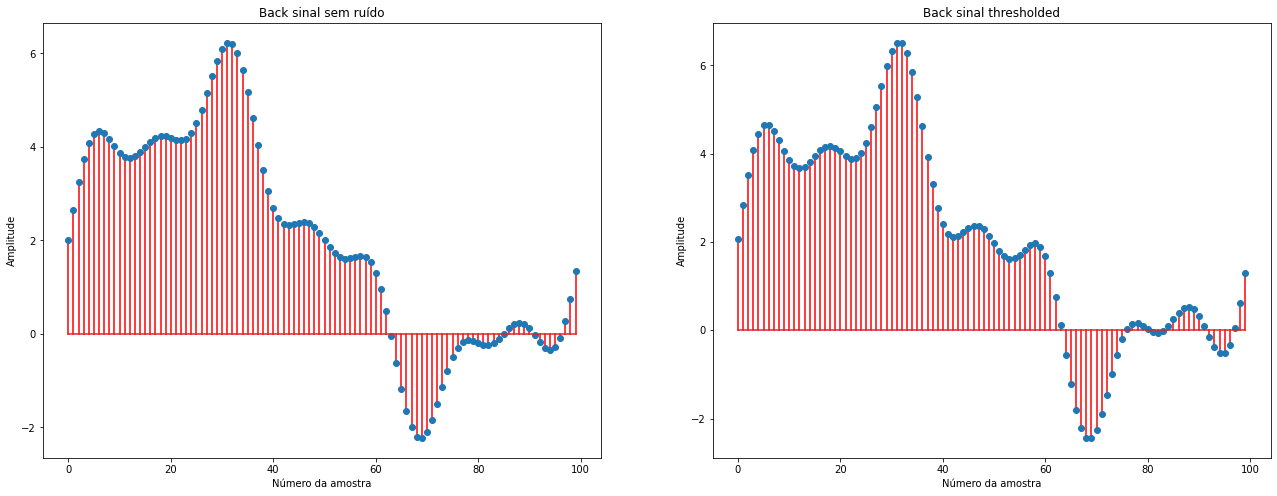

In [10]:
back_signal_no_noise = IDFT_1D(signal_without_noise_Y)
back_signal_thresholded = IDFT_1D(thresholded_signal)

for i in range(N):
    back_signal_no_noise[i] = back_signal_no_noise[i] * (-1)**i
    back_signal_thresholded[i] = back_signal_thresholded[i] * (-1)**i

plt.figure(figsize = (22, 8))
plt.subplot(121),plt.stem(t_amostra, np.real(back_signal_no_noise), linefmt='red')
plt.xlabel('Número da amostra')
plt.ylabel('Amplitude')
plt.title('Back sinal sem ruído')
plt.subplot(122),plt.stem(t_amostra, np.real(back_signal_thresholded), linefmt='red')
plt.xlabel('Número da amostra')
plt.ylabel('Amplitude')
plt.title('Back sinal thresholded')
plt.show()

## That's it for now, Folks !!